In [16]:
from matplotlib import pyplot
from autumn.core.plots.utils import REF_DATE
from summer.utils import ref_times_to_dti
import pandas as pd
import json
from autumn.settings import PROJECTS_PATH
import os

from autumn.core.project import get_project, load_timeseries

In [2]:
project = get_project("sm_sir", "national-capital-region")

In [12]:
update_params = {
    "age_groups": [0, 15, 25, 50, 70],
}
params = project.param_set.baseline.update(update_params, calibration_format=True)


In [13]:
model = project.run_baseline_model(params)
derived_df = model.get_derived_outputs_df()

<AxesSubplot:>

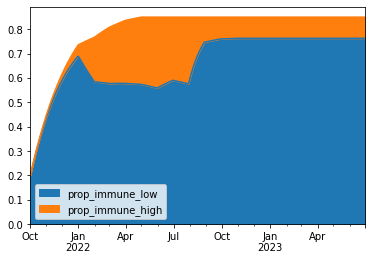

In [14]:
derived_df.plot.area(y=["prop_immune_low", "prop_immune_high"])

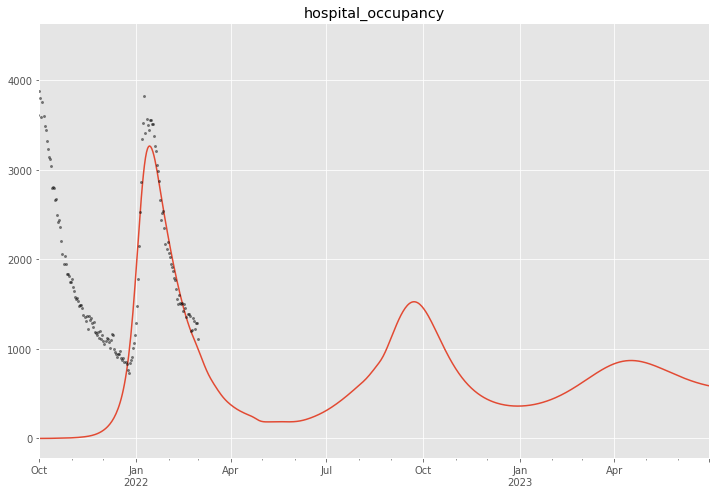

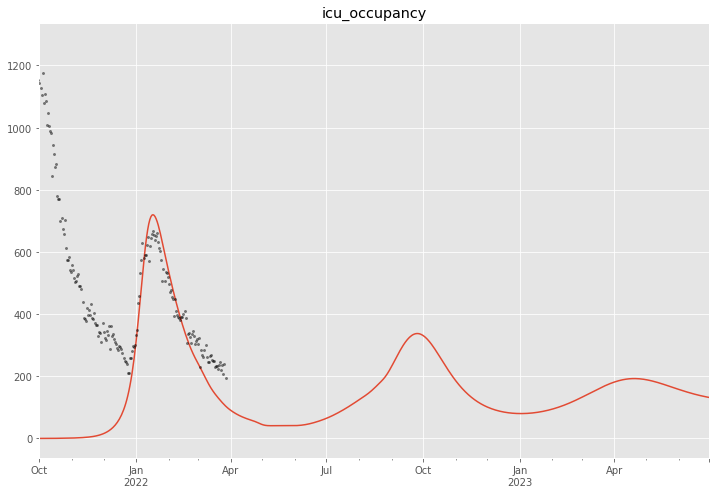

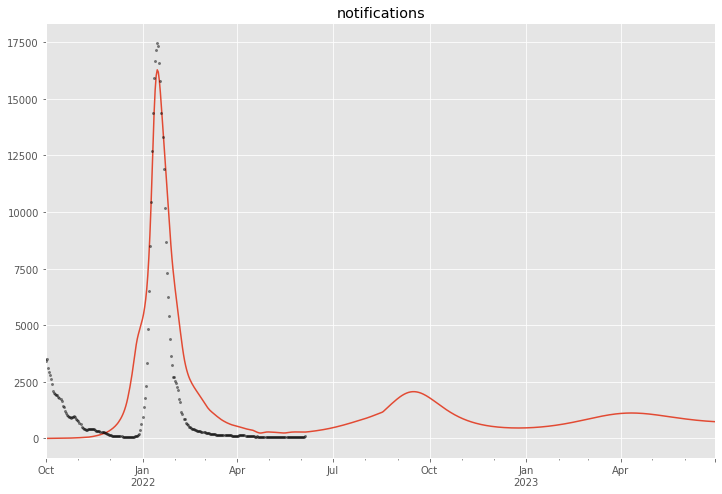

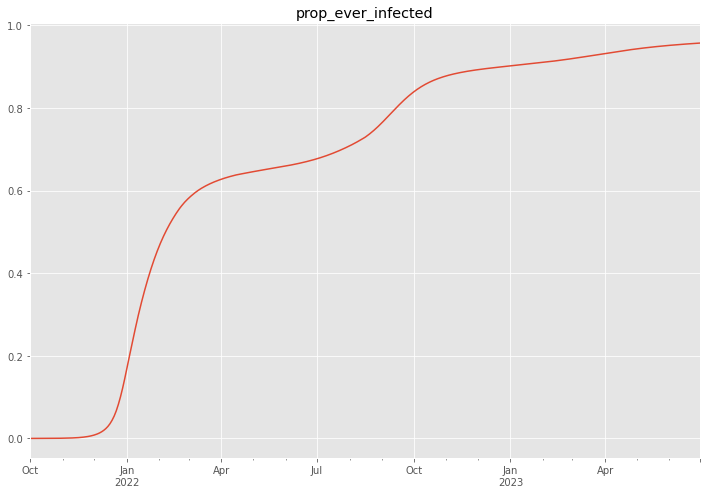

In [20]:
outputs = ["hospital_occupancy", "icu_occupancy", "notifications", "prop_ever_infected"] #, "hospital_admissions", "hospital_occupancy", "icu_admissions", "icu_occupancy"]

all_targets = load_timeseries(os.path.join(project.get_path(), "timeseries.json"))
if project.region_name == "national-capital-region":
    new_targets = load_timeseries(os.path.join(project.get_path(), "new_targets.json"))
    all_targets.update(new_targets)

for target in all_targets:
    all_targets[target].index = ref_times_to_dti(REF_DATE, all_targets[target].index)  

    
for output in outputs:
    fig = pyplot.figure(figsize=(12, 8))
    pyplot.style.use("ggplot")
    axis = fig.add_subplot()

    axis = derived_df[output].plot()
    axis.set_title(output)
    
    if output in project.plots:
        # all_targets[output].plot.line(ax=axis, linewidth=0., markersize=10., marker="o")
        axis.scatter(all_targets[output].index, all_targets[output], color="k", s=5, alpha=0.5, zorder=10)         
